In [1]:
import sys
import os
import numpy as np
import tensorflow as tf
tf.get_logger().setLevel('ERROR') # only show error messages

from newsrec_utils import prepare_hparams

print("System version: {}".format(sys.version))
print("Tensorflow version: {}".format(tf.__version__))

os.environ["CUDA_VISIBLE_DEVICES"]="0"

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

System version: 3.6.11 | packaged by conda-forge | (default, Nov 27 2020, 18:57:37) 
[GCC 9.3.0]
Tensorflow version: 1.15.4
Num GPUs Available:  1


In [2]:
epochs = 8
seed = 42
batch_size = 32

MIND_type = 'small'

In [3]:
data_path = 'dataset/MIND'+MIND_type
train_news_file = os.path.join(data_path, 'train', r'news.tsv')
train_behaviors_file = os.path.join(data_path, 'train', r'train_behaviors.tsv')
wordEmb_file = os.path.join(data_path, "utils", "embedding_all.npy")
userDict_file = os.path.join(data_path, "utils", "uid2index.pkl")
wordDict_file = os.path.join(data_path, "utils", "word_dict_all.pkl")
vertDict_file = os.path.join(data_path, "utils", "vert_dict.pkl")
subvertDict_file = os.path.join(data_path, "utils", "subvert_dict.pkl")
yaml_file = os.path.join(data_path, "utils", r'DRUIC.yaml')

valid_news_file = os.path.join(data_path, 'train', r'news.tsv')
valid_behaviors_file = os.path.join(data_path, 'train', r'val_behaviors.tsv')
test_news_file = os.path.join(data_path, 'valid', r'news.tsv')
test_behaviors_file = os.path.join(data_path, 'valid', r'test_behaviors.tsv')

In [4]:
from mind_all_iterator import MINDAllIterator
from DRUIC import DRUIC
import json
from datetime import datetime

In [5]:
hparams = prepare_hparams(
    yaml_file, 
    wordEmb_file=wordEmb_file,
    wordDict_file=wordDict_file, 
    userDict_file=userDict_file,
    vertDict_file=vertDict_file, 
    subvertDict_file=subvertDict_file,
    batch_size=batch_size,
    epochs=epochs,
    show_step=10,
    support_quick_scoring=False
            )   

In [6]:
iterator = MINDAllIterator
model = DRUIC(hparams, iterator,seed=seed)


AttributeError: 'HParams' object has no attribute 'crop_tao'

In [10]:
learning_rate = 0.0001



channels_list= [6]
#GRU_tp_list = [0.1]

# GRU_tp_list = [0.01,0.05,0.1]
# infer_loss_weight = [1.0]
# infer_loss_weight = np.arange(0.1,1.1,0.1)
# infer_loss_weight = [0.5]
infer_loss_weight = [0.5]
pr_tp_list = [0.1]
#pr_tp_list = [0.1, 0.07, 1.0, 0.5]
#infer_ratios = np.arange(1.0,0.0,-0.1)
#infer_ratios = [1.0]

#head_dims = [400]
head_dims = [64,100,200]
ctr2_ds = [64]


ctr1_loss_weight = [0.0]
ctr2_loss_weight = [0.1]
# ctr_rations = np.arange(0.7,0.2,-0.1)

#filter_his_nums = [5, 10, 15, 20, 25, 30]
#filter_his_nums = [10]
filter_his_nums = [10]



aug_teams = [
   
    ["mask","mask"]
]

ssa_rs = [0.5]

ctr1_mask_ratios = [0.5]
ctr2_mask_ratios = [0.5]


In [ ]:
%%time

ddate = '231009'
detail_file = 'Result/'+ddate+'/'

if not os.path.exists(detail_file+'result/'):
    os.makedirs(detail_file+'result/') 
if not os.path.exists(detail_file+'log/'):
    os.makedirs(detail_file+'log/')    
if not os.path.exists(detail_file+'loss/'):
    os.makedirs(detail_file+'loss/')


flag = 2

if flag==1:
    epochs=1
    

save_model = True


#base_scorer = 'pre_base_model/1115_CNN/epoch2_scorer_weights'
# base_newsencoder = 'pre_base_model/1124_pre/epoch1_newsencoder_weights'

for i in range(10):
    for Channels in channels_list:
        for if_w in infer_loss_weight:
            for Pr_tp in pr_tp_list:
                for ctr1_w in ctr1_loss_weight:          
                    for ctr2_w in ctr2_loss_weight: 
                        for filter_his_num in filter_his_nums:
                            for dim in head_dims:
                                for rs in ssa_rs:
                                    for if_e in ctr1_mask_ratios:
                                        for ctr2_mask in ctr2_mask_ratios:
                                            for ctr2_d in ctr2_ds:
                                                if ctr2_w == 0.0:
                                                    aug_teams_1 = [aug_teams[0]]

                                                else:
                                                    aug_teams_1 = aug_teams

                                                for aug_t in aug_teams_1:                        
                                                    aug1 = aug_t[0]
                                                    aug2 = aug_t[1]
                                                    crop_tao = 0.2
                                                    ctr2_mask_gamma = ctr2_mask
                                                    ctr2_reorder_beta = 0.2


                                                    detail_info = str(Channels)+'_'+str(Pr_tp)+'_'+str(if_w)+'_'+str(ctr1_w)+'_'+str(ctr2_w)+'_'+str(aug1)+'_'+str(aug2)+'_'+str(crop_tao)+'_'+str(ctr2_mask_gamma)+'_'+str(ctr2_reorder_beta)+'_'+str(filter_his_num)+'_'+str(dim)+'_'+str(rs)+'_'+str(if_e)+'_'+str(ctr2_d)

                                                    log_file_name = detail_file+'log/'+detail_info+'_0_.txt'
                                                    result_file_name = detail_file+'result/'+detail_info+'_0_.txt'


                                                    files = os.listdir(detail_file+'loss/')   # 读入文件夹
                                                    num_png = len(files)
                                                    loss_file = detail_file+'loss/'+detail_info+'_'+str(num_png+1)+'_0_.txt'


                                                    save_file = 'saved_model/'+ddate+'/'+detail_info+'/'
                                                    #save_file = 'saved_model/'+ddate+'/mask_ratio_'+str(if_e)+'_'+str(ctr2_mask)+'/'+str(if_w)+'_'+str(ctr1_w)+'_'+str(ctr2_w)+'/'

                                                    if not os.path.exists(save_file):
                                                        os.makedirs(save_file)



                                                    #if os.path.exists(log_file_name):
                                                    #    continue

                                                    tf.reset_default_graph()

                                                    ctr1_pos_file = 'ctr1_pre_file/221201/user_his_pos_'+str(filter_his_num)+'.pickle'

                                                    hparams = prepare_hparams(
                                                                      yaml_file, 
                                                                      wordEmb_file=wordEmb_file,
                                                                      wordDict_file=wordDict_file, 
                                                                      userDict_file=userDict_file,
                                                                      vertDict_file=vertDict_file, 
                                                                      subvertDict_file=subvertDict_file,
                                                                      batch_size=32,
                                                                      epochs=epochs,
                                                                      show_step=10,
                                                                      support_quick_scoring=False,
                                                                      channels=Channels,
                                                                      gru_tp=0.1,
                                                                      purpose_router_tp=Pr_tp,
                                                                      infer_loss_weight=if_w,
                                                                      ctr1_loss_weight=ctr1_w,
                                                                      ctr2_loss_weight=ctr2_w,
                                                                      head_num=1,
                                                                      head_dim=dim,
                                                                      filter_num = dim,
                                                                      learning_rate = 0.0001,                                          
                                                                      filter_his_num = filter_his_num,   
                                                                      aug1 = aug1,
                                                                      aug2 = aug2,
                                                                      crop_tao = crop_tao,
                                                                      ctr2_mask_gamma = ctr2_mask_gamma,
                                                                      ctr2_reorder_beta = ctr2_reorder_beta,
                                                                      delta = 1.0,
                                                                      ssa_r = rs,
                                                                      proj_dim = 300,
                                                                      ctr1_pos_file = ctr1_pos_file,
                                                                      ctr1_mask_ratio = if_e,
                                                                      #vert_emb_dim = 300,
                                                                      #subvert_emb_dim = 300,
                                                                      ctr2_d = ctr2_d,

                                                                      )        

                                                    iterator = MINDAllIterator
                                                    model = MI_MCPRNModel(hparams, iterator,user_att_type=1.0, ctr_type=2.0,seed=seed)




                                                    if flag==0:

                                                        #model.newsencoder.load_weights(base_newsencoder)

                                                        model.fit(train_news_file, train_behaviors_file,
                                                                  #None,None,                                                      
                                                                  test_news_file, test_behaviors_file,
                                                                  #result_file_name = file,
                                                                  log_file_name = log_file_name
                                                                 )

                                                        if save_model:
                                                            scorer_model = model.scorer
                                                            #news_att_model = model.news_att_encoder
                                                            base_newsencoder = scorer_model.layers[2]
                                                            base_userencoder = scorer_model.layers[3]

                                                            info = str(ctr1_w)+'_'+str(ctr2_w)+'_'+str(if_e)

                                                            #news_att_model.save_weights(save_file+info+'_news_att_model_weights')
                                                            scorer_model.save_weights(save_file+info+'_scorer_weights')
                                                            base_newsencoder.save_weights(save_file+info+'_newsencoder_weights')
                                                            base_userencoder.save_weights(save_file+info+'_userencoder_weights')


                                                    elif flag==1:

                                                        for j in range(3):
                                                            model.fit(train_news_file, train_behaviors_file,None,None)
                                                            scorer_model = model.scorer
                                                            news_att_model = model.news_att_encoder
                                                            base_newsencoder = scorer_model.layers[2]
                                                            base_userencoder = scorer_model.layers[3]
                                                            news_att_model.save_weights(save_file+'epoch'+str(j+1)+'_news_att_model_weights')
                                                            scorer_model.save_weights(save_file+'epoch'+str(j+1)+'_scorer_weights')
                                                            base_newsencoder.save_weights(save_file+'epoch'+str(j+1)+'_newsencoder_weights')
                                                            base_userencoder.save_weights(save_file+'epoch'+str(j+1)+'_userencoder_weights')
                                                    else:

                                                        with open(result_file_name,'a+') as f:
                                                            f.write(str(hparams)+"\n\n")                
                                                        f.close()                

                                                        model.fit(train_news_file, train_behaviors_file,valid_news_file, valid_behaviors_file,
                                                                  log_file_name=log_file_name,loss_file = loss_file)
                                                        res_syn = model.run_eval(test_news_file, test_behaviors_file,'test')
                                                        #res_syn = model.run_eval(valid_news_file, valid_behaviors_file)

                                                        utc_now = datetime.utcnow()
                                                        with open(result_file_name,'a+') as f:               
                                                            f.write("\n-----------\n")
                                                            f.write(str(utc_now)+"\n")
                                                            f.write("epoch: "+str(epochs)+"\n")
                                                            #f.write("epsilon:"+str(K.eval(self.\))+"\n")
                                                            f.write("train info:"+json.dumps(res_syn)+"\n")
                                                            f.write("eval info:"+json.dumps(res_syn)+"\n\n")                
                                                        f.close()                


                                                        if save_model:
                                                            scorer_model = model.scorer
                                                            #news_att_model = model.news_att_encoder
                                                            base_newsencoder = scorer_model.layers[6]
                                                            base_userencoder = scorer_model.layers[7]

                                                            files = os.listdir(save_file)   # 读入文件夹
                                                            num_png = len(files)       # 统计文件夹中的文件个数

                                                            info = '/'+str(num_png+1)+'/'

                                                            #news_att_model.save_weights(save_file+info+'news_att_model_weights')
                                                            scorer_model.save_weights(save_file+info+'scorer_weights')
                                                            base_newsencoder.save_weights(save_file+info+'newsencoder_weights')
                                                            base_userencoder.save_weights(save_file+info+'userencoder_weights')



##########################################################################                                                
                                                
#                                             model.fit(train_news_file, train_behaviors_file,None,None)
#                                             res_syn = model.run_eval(test_news_file, test_behaviors_file)

#                                             utc_now = datetime.utcnow()
#                                             with open(result_file_name,'a+') as f:                                    
#                                                 f.write(str(hparams)+"\n\n")    
#                                                 f.write("\n-----------\n")
#                                                 f.write(str(utc_now)+"\n")
#                                                 f.write("epoch: "+str(epochs)+"\n")
#                                                 f.write("train info:"+json.dumps(res_syn)+"\n")
#                                                 f.write("eval info:"+json.dumps(res_syn)+"\n\n")                                                    
#                                                 f.close()     
                                                
                                      
#                                         scorer_model = model.scorer
#                                         news_att_model = model.news_att_encoder
#                                         news_att_model.save_weights(save_file+str(if_w)+'news_att_model_weights')
#                                         scorer_model.save_weights(save_file+str(if_w)+'scorer_weights')


finish initial Iterator
finish initial Iterator
finish initial Iterator
start _build_graph...
Model: "news_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 300)      18297900    input_11[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 80, 300)      0           embedding[0][0]                  
__________________________________________________________________________________________________
compute_masking (ComputeMasking (None, 80)           0           input_11[0][0]             

Model: "news_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 80)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 80, 300)      18297900    input_11[0][0]                   
__________________________________________________________________________________________________
dropout (Dropout)               (None, 80, 300)      0           embedding[0][0]                  
__________________________________________________________________________________________________
compute_masking (ComputeMasking (None, 80)           0           input_11[0][0]                   
_______________________________________________________________________________________

user_present: Tensor("user_encoder/tf_op_layer_transpose_39/transpose_39:0", shape=(?, 6, 128), dtype=float32) ; news_present: (?, 5, 6, 128) ;  news_present_one: (?, 6, 128)
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 50, 30)]     0                                            
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 50, 50)]     0                                            
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 50, 80)       0           input_2[0][0]                    
                                                                 input_3[0][0]                    
__________________


0it [00:00, ?it/s]

finish init_behaviors


step 5200 , total_loss: 2.2130, data_loss: 1.8375, recommendation_total_loss: 1.7629 recommendation_loss: 1.5139 , infer_total_loss: 0.2754, infer_loss: 0.1621,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.1747, ctr2_loss: 0.1615: : 5202it [51:09,  1.69it/s]
0it [00:00, ?it/s]

finish init_behaviors


6731it [08:04, 13.88it/s]
0it [00:00, ?it/s]

at epoch 1
train info: logloss loss:2.2128306759728327,reco_loss:1.7628150734017785,infer_loss:0.27533303439811946,ctr1_loss:0.0,ctr2_loss:0.17468257061349388
eval info: group_auc:0.7224, mean_mrr:0.3644, ndcg@10:0.4612, ndcg@5:0.4034
at epoch 1 , train time: 3069.9 eval time: 490.6


step 5200 , total_loss: 1.7605, data_loss: 1.4410, recommendation_total_loss: 1.5044 recommendation_loss: 1.2163 , infer_total_loss: 0.1556, infer_loss: 0.1421,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.1005, ctr2_loss: 0.0826: : 5202it [51:36,  1.68it/s]
264it [00:18, 14.14it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

6731it [07:54, 14.20it/s]
0it [00:00, ?it/s]

at epoch 3
train info: logloss loss:1.6545457577118732,reco_loss:1.442802300204776,infer_loss:0.12315816845729094,ctr1_loss:0.0,ctr2_loss:0.08858529068150059
eval info: group_auc:0.7461, mean_mrr:0.3845, ndcg@10:0.4845, ndcg@5:0.428
at epoch 3 , train time: 3010.4 eval time: 479.4


step 760 , total_loss: 1.6015, data_loss: 1.4818, recommendation_total_loss: 1.4090 recommendation_loss: 1.3074 , infer_total_loss: 0.1080, infer_loss: 0.1023,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.0846, ctr2_loss: 0.0721: : 766it [07:26,  1.73it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

step 5200 , total_loss: 1.5484, data_loss: 1.5007, recommendation_total_loss: 1.3700 recommendation_loss: 1.3875 , infer_total_loss: 0.1008, infer_loss: 0.0819,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.0776, ctr2_loss: 0.0313: : 5202it [51:05,  1.70it/s]
6731it [07:50, 14.31it/s]
0it [00:00, ?it/s]

at epoch 5
train info: logloss loss:1.5484809479957267,reco_loss:1.3700709451464037,infer_loss:0.10082572073271438,ctr1_loss:0.0,ctr2_loss:0.07758428260608104
eval info: group_auc:0.7506, mean_mrr:0.3903, ndcg@10:0.4917, ndcg@5:0.4348
at epoch 5 , train time: 3065.2 eval time: 476.2


step 410 , total_loss: 1.5180, data_loss: 1.6134, recommendation_total_loss: 1.3438 recommendation_loss: 1.3688 , infer_total_loss: 0.0985, infer_loss: 0.1036,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.0757, ctr2_loss: 0.1411: : 410it [03:57,  1.65it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

step 5200 , total_loss: 1.5138, data_loss: 1.4648, recommendation_total_loss: 1.3431 recommendation_loss: 1.2566 , infer_total_loss: 0.0972, infer_loss: 0.0932,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.0734, ctr2_loss: 0.1150: : 5202it [50:54,  1.70it/s]
6731it [07:53, 14.23it/s]
0it [00:00, ?it/s]

at epoch 6
train info: logloss loss:1.5138206681990707,reco_loss:1.34318292835317,infer_loss:0.09724610430639279,ctr1_loss:0.0,ctr2_loss:0.07339163762522645
eval info: group_auc:0.7519, mean_mrr:0.3903, ndcg@10:0.4909, ndcg@5:0.4337
at epoch 6 , train time: 3054.1 eval time: 478.4


step 4410 , total_loss: 1.4898, data_loss: 1.4477, recommendation_total_loss: 1.3233 recommendation_loss: 1.1976 , infer_total_loss: 0.0947, infer_loss: 0.1286,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.0717, ctr2_loss: 0.1215: : 4410it [42:28,  1.73it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

step 5200 , total_loss: 1.4624, data_loss: 1.6765, recommendation_total_loss: 1.3011 recommendation_loss: 1.5559 , infer_total_loss: 0.0923, infer_loss: 0.0883,  ctr1_total_loss: 0.0000, ctr1_loss: 0.0000,  ctr2_total_loss: 0.0690, ctr2_loss: 0.0323: : 5202it [49:55,  1.74it/s]
5468it [06:28, 14.09it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the 

# 测试iterator

In [7]:
scorer_model = model.scorer
news_att_model = model.news_att_encoder
base_newsencoder = scorer_model.layers[2]
base_userencoder = scorer_model.layers[3]

base_newsencoder.save_weights('pre_base_model/1119/0.1_0.0/newsencoder_weights')
base_userencoder.save_weights('pre_base_model/1119/0.1_0.0/userencoder_weights')

news_att_model.save_weights('pre_base_model/1119/0.1_0.0/news_att_model_weights')
scorer_model.save_weights('pre_base_model/1119/0.1_0.0/scorer_weights')

In [12]:
epision = tf.constant([0.0,0.0,0.0]) 

with open('test.txt','a+') as f:               
    f.write("\n-----------\n")
    #f.write(str(utc_now)+"\n")
    f.write("epoch: "+str(1)+"\n")
    f.write("epsilon:"+str(K.eval(epision)))
    #f.write("train info:"+json.dumps(train_info)+"\n")
    #f.write("eval info:"+json.dumps(eval_info)+"\n\n")                
f.close()                


In [7]:
res_syn

NameError: name 'res_syn' is not defined

In [1]:
sample_num = 2000
all_news = model.train_iterator.load_news_from_file(train_news_file)
print(all_news.shape)
idxs = tf.range(tf.shape(all_news)[0])
ridxs = tf.random.shuffle(idxs)[:sample_num]
rinput = tf.gather(all_news, ridxs)

all_news_emd = model.newsencoder(rinput)
all_news_weights,_ = model.PurposeRouter(all_news_emd) #()
print("all_news_weights:",all_news_weights)
all_weights_ave = tf.reduce_mean(all_news_weights,0) 
print("all_weights_ave:",all_weights_ave)
#return all_weights_ave


NameError: name 'model' is not defined

In [2]:
a=all_weights_ave

NameError: name 'all_weights_ave' is not defined

In [33]:
tf.Print(a,['a_value: ',a])

<tf.Tensor 'Print_4:0' shape=(3,) dtype=float32>

In [4]:
import tensorflow as tf
aa = tf.constant([1.0,1.0,1.0])

In [8]:
str(K.eval(aa))

'[1. 1. 1.]'

In [15]:
K.eval(all_weights_ave)

array([0.7248746, 0.7360896, 0.7241908], dtype=float32)

In [21]:
aa = K.eval(tf.cast(all_news_weights>all_weights_ave,tf.float32))

In [24]:
aa = tf.reduce_sum(aa,0)

In [25]:
K.eval(aa)

array([1122., 1077., 1103.], dtype=float32)

In [11]:
model.epsilon

<tf.Tensor 'add_15:0' shape=() dtype=float32>

In [9]:
utc_now = datetime.utcnow()
with open(result_file_name,'a+') as f:                                    
    f.write(str(hparams)+"\n\n")    
    f.write("\n-----------\n")
    f.write(str(utc_now)+"\n")
    f.write("epoch: "+str(epochs)+"\n")
    f.write("train info:"+json.dumps(res_syn)+"\n")
    f.write("eval info:"+json.dumps(res_syn)+"\n\n")                                                    
    f.close()                


In [7]:
res_syn

{'group_auc': 0.6781, 'mean_mrr': 0.3155, 'ndcg@5': 0.3497, 'ndcg@10': 0.4137}

In [22]:
weights = [[0.9,0.7,0.5,0.1,0.3]]*10
weights_mean = [[0.5]*5]*10

In [23]:
weights = np.array(weights)
weights_mean = np.array(weights_mean)

In [24]:
att = tf.cast(weights>=weights_mean,tf.float32)#(?,3,50)

In [25]:
K.eval(att)

array([[1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.],
       [1., 1., 1., 0., 0.]], dtype=float32)

In [26]:
att_matrix = tf.matmul(tf.expand_dims(att,-1),tf.expand_dims(att,-1),transpose_b=True)

In [27]:
att_matrix

<tf.Tensor 'MatMul_22:0' shape=(10, 5, 5) dtype=float32>

In [28]:
K.eval(att_matrix)

array([[[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.],
        [1., 1., 1., 0., 0.]

In [29]:
att_diag_matrix = tf.one_hot(tf.range(5),5) #(50,50)
att_diag_matrix = tf.reshape(att_diag_matrix,[1,5,5])
att_diag_matrix = tf.tile(att_diag_matrix, [10,1, 1])#(?,3,50,50)


In [10]:
from tensorflow.keras import backend as K

In [30]:

K.eval(att_diag_matrix)

array([[[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1.]],

       [[1., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0.]

In [35]:
K.eval(1-att_diag_matrix)

array([[[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0.]],

       [[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0.]],

       [[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0.]],

       [[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0.]],

       [[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0.]],

       [[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.],
        [1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 0.]],

       [[0., 1., 1., 1., 1.],
        [1., 0., 1., 1., 1.],
        [1., 1., 0., 1., 1.]

In [36]:
vv = tf.math.multiply(att_matrix,1-att_diag_matrix)

In [37]:
K.eval(vv)

array([[[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]],

       [[0., 1., 1., 0., 0.],
        [1., 0., 1., 0., 0.],
        [1., 1., 0., 0., 0.]

In [7]:
res_syn = model.run_eval(test_news_file, test_behaviors_file)

NameError: name 'model' is not defined

In [10]:
hparams.channels

3

In [3]:
aa = {"channels:":3,"gru_tp:":0.1}

In [5]:
str(aa)

"{'channels:': 3, 'gru_tp:': 0.1}"

In [6]:
hparams

NameError: name 'hparams' is not defined

In [8]:
str(utc_now)

'2022-06-16 15:06:14.528191'

In [25]:
str(utc_now)+"\n"

'2022-05-10 13:17:12.964424\n'

In [18]:
model

In [7]:
import tensorflow as tf
rand_ind = np.arange(0,10).reshape([1,10])



In [18]:
rand_ind

array([[8, 1, 5, 0, 7, 2, 9, 4, 3, 6],
       [8, 1, 5, 0, 7, 2, 9, 4, 3, 6],
       [8, 1, 5, 0, 7, 2, 9, 4, 3, 6]])

In [9]:
rand_ind = rand_ind.repeat(3,axis=0)  

In [17]:
rand_ind = np.transpose(rand_ind)

In [15]:
np.random.shuffle(rand_ind)

In [12]:

# rand_ind = tf.tile(tf.expand_dims(rand_ind,0),[3,1]) #(3,50)
for ind in rand_ind:
    print(ind)
    np.random.shuffle(ind)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [13]:
rand_ind = rand_ind.reshape([3,3,10])

ValueError: cannot reshape array of size 30 into shape (3,3,10)

In [20]:
rand_ind

array([[8, 1, 5, 0, 7, 2, 9, 4, 3, 6],
       [0, 1, 8, 5, 3, 4, 7, 9, 6, 2],
       [9, 2, 0, 6, 8, 5, 3, 7, 1, 4]])

In [19]:
rand_ind[:,[1,2,3]]

array([[1, 5, 0],
       [1, 8, 5],
       [2, 0, 6]])

In [10]:
ii = np.arange(0,9).reshape(3,3)

In [12]:
for i in ii:
    np.random.shuffle(i)

In [13]:
ii

array([[1, 2, 0],
       [3, 4, 5],
       [8, 7, 6]])

In [1]:
import numpy as np
np.random([0,10])

TypeError: 'module' object is not callable

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold

# ColorList=['r','g','b','yello']

def plot_vectors(X,y,label_nums):
# X=news_tr[:501]
# y=test_news_labels[:501]
    ColorList = plt.cm.rainbow(np.linspace(0,1,label_nums))
    '''X是特征，不包含target;X_tsne是已经降维之后的特征'''
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=501)
    X_tsne = tsne.fit_transform(X)
    # print("Org data dimension is {}. Embedded data dimension is {}".format(X.shape[-1], X_tsne.shape[-1]))

    #   '''嵌入空间可视化'''
    x_min, x_max = X_tsne.min(0), X_tsne.max(0)
    X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
    plt.figure(figsize=(8, 8))
    for i in range(X_norm.shape[0]):
        plt.text(X_norm[i, 0], X_norm[i, 1], str(y[i]), color=ColorList[int(y[i])], 
                 fontdict={'weight': 'bold', 'size': 9})
    plt.xticks([])
    plt.yticks([])
    plt.show()
    
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def plot_attention(attention, sentence, predicted_sentence):
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(attention, cmap='viridis')

    fontdict = {'fontsize': 14}

    ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
    ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

    plt.show()

import pickle
wordDict = pickle.load(open(wordDict_file, 'rb'), encoding='utf-8')
dictWord = {v:k for k,v in wordDict.items()}
dictWord[0]='-'

vertDict = pickle.load(open(vertDict_file, 'rb'), encoding='utf-8')
dictVert = {v:k for k,v in vertDict.items()}
dictVert[0]='-'

subvertDict = pickle.load(open(subvertDict_file, 'rb'), encoding='utf-8')
dictsubVert = {v:k for k,v in subvertDict.items()}
dictsubVert[0]='-'

In [8]:
scorer_model = model.scorer
from tensorflow.keras.models import Model
weight_layer = model.PurposeRouter
news_encoder = scorer_model.layers[2]
user_encoder = scorer_model.layers[3]
self_att_emd_layer = Model(inputs = news_encoder.layers[0].input,outputs = news_encoder.layers[3].output)
masking_layer = news_encoder.layers[5]
# att_layer_layer_1 = news_encoder.layers[6]

In [19]:
att_layer_layer_1 = news_encoder.layers[6]
att_layer_layer_2 = news_encoder.layers[7]
att_layer_layer_3 = news_encoder.layers[8]

In [10]:
model.news_att_encoder.summary()

Model: "news_att_encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 30)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 30, 300)      18297900    input_8[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 30, 300)      0           embedding[0][0]                  
__________________________________________________________________________________________________
self_attention (SelfAttention)  (None, None, 900)    810000      dropout[0][0]                    
                                                                 dropout[0][0]     

In [9]:
ittt = iterator(
            hparams,
            #hparams.npratio,
            col_spliter="\t",
        )

ittt.init_news(test_news_file)
ittt.init_behaviors(test_behaviors_file)
News_title = ittt.news_title_index

ttt = ittt.load_data_from_file(test_news_file,test_behaviors_file)

News_vert = ittt.news_vert_index
News_subvert = ittt.news_subvert_index

finish init_behaviors


In [12]:
News_title.shape

(42417, 30)

In [14]:
aaa = model.news_att_encoder(News_title[:500])f

In [18]:
from tensorflow.keras import backend as K
bbb = K.eval(aaa)

In [19]:
bbb.shape

(500, 30, 3)

In [22]:
bbb[25,:,0]

array([0.10000023, 0.10000005, 0.09999995, 0.10000005, 0.09999994,
       0.09999961, 0.10000057, 0.09999958, 0.10000057, 0.09999946,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [23]:
bbb[25,:,1]

array([0.10237348, 0.10041612, 0.10148773, 0.09895781, 0.09976421,
       0.10352611, 0.09504468, 0.10202207, 0.09504468, 0.10136313,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [24]:
bbb[25,:,2]

array([0.09925504, 0.09963463, 0.10037381, 0.10044171, 0.10019094,
       0.09951217, 0.10031725, 0.09981669, 0.10031725, 0.1001405 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [ ]:
for t in ttt:
    print(t)

In [11]:
User_his={}
Train_data =[]

for batch in ttt:
    impression_index_batch = batch['impression_index_batch']
    user_index_batch = batch['user_index_batch']
    clicked_title_batch = batch['clicked_title_batch']
    clicked_ab_batch = batch['clicked_ab_batch']
    clicked_vert_batch = batch['clicked_vert_batch']
    clicked_subvert_batch = batch['clicked_subvert_batch']
    candidate_title_batch = batch['candidate_title_batch']
    candidate_ab_batch = batch['candidate_ab_batch']
    candidate_vert_batch = batch['candidate_vert_batch']
    candidate_subvert_batch = batch['candidate_subvert_batch']
    labels = batch['labels']
    
    for i in range(32):
        if user_index_batch[i][0] not in User_his:
            User_his[user_index_batch[i][0]] = [clicked_title_batch[i],clicked_vert_batch[i],clicked_subvert_batch[i]]
        
        data = [user_index_batch[i][0],candidate_title_batch[i],candidate_vert_batch[i],candidate_subvert_batch[i]]
        Train_data.append(data)


KeyboardInterrupt: 

In [12]:
from tensorflow.keras import backend as K
all_news = News_title
all_news_vert = News_vert
all_news_subvert = News_subvert

In [13]:
all_news.shape

(42417, 30)

In [14]:
all_news_unique, indices = np.unique(all_news,axis=0,return_index=True)
news_multi_emd = news_encoder(all_news_unique[:5000])
weights, weights_ori = weight_layer(news_multi_emd, None)
weights = K.eval(weights)

In [15]:
for w in weights:
    print(w)

[-0.00924264  0.34910372  0.34300497]
[0.4764535  0.37171558 0.5455463 ]
[0.4305751  0.37251785 0.5669772 ]
[0.5332796  0.43525007 0.5456779 ]
[0.5321771  0.45478362 0.5802451 ]
[0.4616334 0.441471  0.5543741]
[0.48113263 0.41261068 0.4744966 ]
[0.48144522 0.3673174  0.47542042]
[0.45893195 0.4079956  0.40439957]
[0.42934713 0.4407392  0.43693787]
[0.52123964 0.4524721  0.5620555 ]
[0.44277185 0.39594722 0.50527626]
[0.5247558  0.54343176 0.5312837 ]
[0.51788545 0.4700229  0.54927206]
[0.5038062 0.3006517 0.4679336]
[0.5046695  0.45637155 0.5452095 ]
[0.5460739  0.55017185 0.6287114 ]
[0.55784273 0.47214398 0.5865889 ]
[0.52929634 0.5202778  0.5333456 ]
[0.5208136  0.43037975 0.5359158 ]
[0.47921294 0.44420046 0.47418603]
[0.47443968 0.4078906  0.5167334 ]
[0.55598336 0.51131326 0.58518976]
[0.5136422  0.39440498 0.5041792 ]
[0.46730402 0.4919703  0.55849326]
[0.4727841  0.47353485 0.56064934]
[0.43529668 0.46654308 0.55844074]
[0.44221282 0.42624074 0.52036434]
[0.5173235 0.5163808 0.

[0.5303875 0.4142877 0.5818985]
[0.48373732 0.42315635 0.53606844]
[0.43603137 0.5049883  0.57254577]
[0.550499  0.5122906 0.5609803]
[0.50653446 0.39417654 0.58760524]
[0.5253871  0.423563   0.60813695]
[0.45499253 0.4617609  0.54589224]
[0.5129506  0.4109272  0.57202226]
[0.36716646 0.36983025 0.5051275 ]
[0.44472045 0.4879981  0.55642873]
[0.5120256  0.42306888 0.5752441 ]
[0.47936943 0.36133122 0.5331753 ]
[0.49141803 0.4585573  0.570096  ]
[0.4679014  0.41819447 0.48809046]
[0.5584545 0.5632616 0.5738778]
[0.5250182  0.5502931  0.53134584]
[0.30447826 0.23821133 0.39503604]
[0.46447605 0.5008479  0.5495687 ]
[0.55839205 0.5335507  0.5913849 ]
[0.50488394 0.5276835  0.5517507 ]
[0.6338219  0.54040384 0.62360305]
[0.53273106 0.4274769  0.56519884]
[0.46163484 0.38550758 0.5288975 ]
[0.4426795  0.40959665 0.53865075]
[0.5011182  0.5422327  0.53525233]
[0.52402544 0.5440213  0.56734145]
[0.49964818 0.38331217 0.5759701 ]
[0.48544875 0.48057458 0.55579025]
[0.39496693 0.3669939  0.2817

[0.31362948 0.39181608 0.4672129 ]
[0.55393386 0.62879366 0.5925494 ]
[0.48701566 0.43073225 0.5233406 ]
[0.53121454 0.56421083 0.62777793]
[0.46654505 0.5106563  0.57642514]
[0.5004178  0.459979   0.58190477]
[0.54757607 0.5049101  0.5484995 ]
[0.4025325  0.33396047 0.5038687 ]
[0.43685976 0.55204016 0.41323563]
[0.46114776 0.5132766  0.5461913 ]
[0.46524435 0.44407797 0.49439847]
[0.47601286 0.48566046 0.5053585 ]
[0.44457707 0.37191415 0.5307563 ]
[0.57840717 0.46713912 0.54558855]
[0.63210016 0.6247463  0.60529566]
[0.44589522 0.5099937  0.48834312]
[0.5107065  0.43214217 0.57707214]
[0.600892   0.5242433  0.52270955]
[0.42853338 0.39437774 0.5267283 ]
[0.46720126 0.33965352 0.5169009 ]
[0.44339478 0.5544739  0.541722  ]
[0.43267888 0.53270745 0.5371036 ]
[0.43867567 0.54657686 0.5493829 ]
[0.46297583 0.50240964 0.578115  ]
[0.5210267  0.47818205 0.5635962 ]
[0.5245668  0.33884493 0.5485625 ]
[0.52822566 0.507025   0.57805264]
[0.54395586 0.5126935  0.4461327 ]
[0.5591251 0.5388981

[0.52404183 0.46409252 0.5921054 ]
[0.5686793 0.5186896 0.534124 ]
[0.61406595 0.5279268  0.63154197]
[0.28216454 0.35187048 0.5004117 ]
[0.5671311 0.5308335 0.6259417]
[0.5537941 0.4898546 0.5820915]
[0.45601204 0.48126444 0.55970705]
[0.5702788  0.48835737 0.58068794]
[0.4361135  0.4578492  0.50269085]
[0.48335972 0.358434   0.509041  ]
[0.4742352  0.43629432 0.5000765 ]
[0.5374963  0.49320328 0.5624517 ]
[0.47591788 0.39642307 0.51238614]
[0.5401448 0.4782856 0.5520544]
[0.48707134 0.43736744 0.54971504]
[0.4518411 0.4119002 0.5385221]
[0.5314991  0.4204935  0.55105656]
[0.54225165 0.5475337  0.53285   ]
[0.46688718 0.42298797 0.4988723 ]
[0.5809919 0.4580926 0.5499529]
[0.37864098 0.257902   0.49756578]
[0.5625439  0.54946506 0.56781256]
[0.5525183 0.5026124 0.538138 ]
[0.50179213 0.4537733  0.5419045 ]
[0.46633244 0.4370904  0.54979557]
[0.502908   0.48036873 0.5181169 ]
[0.49694195 0.5331242  0.559048  ]
[0.5634024  0.49428958 0.5514416 ]
[0.5279689 0.4334223 0.600266 ]
[0.543707

[0.64882505 0.5269851  0.605328  ]
[0.58814985 0.55891216 0.5905556 ]
[0.49595413 0.45884237 0.48809806]
[0.5402499  0.50939053 0.5742657 ]
[0.5202304  0.46094865 0.530298  ]
[0.43691343 0.405327   0.5260687 ]
[0.49487442 0.6006493  0.49217117]
[0.56950444 0.56918067 0.4991689 ]
[0.4820346 0.5581595 0.5448806]
[0.39058113 0.4001975  0.4827222 ]
[0.604428   0.5614218  0.51678103]
[0.56047845 0.533078   0.53193825]
[0.5178114 0.4557409 0.5549269]
[0.51252055 0.5163224  0.5004989 ]
[0.49212348 0.46741423 0.5092777 ]
[0.50070655 0.48487088 0.54119015]
[0.5058926  0.50502896 0.5125965 ]
[0.52606386 0.51819533 0.51127666]
[0.43537295 0.5541231  0.5468543 ]
[0.6251519  0.535555   0.53707415]
[0.41170657 0.38559932 0.48136306]
[0.56562704 0.54602414 0.57063395]
[0.52699584 0.40731806 0.5744042 ]
[0.4933574  0.47646978 0.55578446]
[0.5498134  0.49347666 0.54783165]
[0.34287405 0.419674   0.4899846 ]
[0.5534926  0.55472827 0.5578211 ]
[0.54508865 0.5808882  0.6124623 ]
[0.49207938 0.46604684 0.4

[0.5212787  0.48167792 0.4228776 ]
[0.5101493  0.4635563  0.50571615]
[0.43203774 0.44099772 0.5218596 ]
[0.35916215 0.3685172  0.43901327]
[0.6261995  0.5711804  0.63123757]
[0.47932225 0.48391458 0.4952034 ]
[0.40841645 0.37597638 0.43999606]
[0.5271465  0.604674   0.62249595]
[0.4826265 0.5058727 0.5200582]
[0.49818787 0.4766114  0.46453285]
[0.38526258 0.29577056 0.50403273]
[0.5202942  0.45602793 0.5803595 ]
[0.5503757  0.45822704 0.5172978 ]
[0.37191817 0.45653197 0.48254526]
[0.35187286 0.3360372  0.3839067 ]
[0.48139   0.4289577 0.5774188]
[0.57015926 0.5023704  0.53398263]
[0.5718874 0.616414  0.5305405]
[0.6029872  0.6616691  0.65223694]
[0.4561552  0.32873046 0.58616894]
[0.524279   0.54661715 0.5572143 ]
[0.5464625 0.4794575 0.5614986]
[0.5559043  0.43438324 0.5454871 ]
[0.48576668 0.3808881  0.4869265 ]
[0.45821044 0.55286497 0.52490765]
[0.5522179 0.5334155 0.5629591]
[0.50673604 0.42295858 0.5324216 ]
[0.40092874 0.43071645 0.4926679 ]
[0.5942867 0.6266151 0.5185185]
[0.

In [17]:
weights_ori = K.eval(weights_ori)

In [18]:
weights_ori[:500]

array([[[ 1.6856753 , -0.91009057, -0.7986419 ],
        [-0.91047037,  1.5252585 , -0.64279354],
        [-0.91081107, -0.9829194 ,  1.8593764 ]],

       [[ 4.776718  , -3.258903  , -1.5225923 ],
        [-3.1052713 ,  6.110878  , -2.996087  ],
        [-2.914399  , -3.1477144 ,  6.100486  ]],

       [[ 4.401465  , -3.0568388 , -1.351321  ],
        [-3.0081668 ,  5.2514033 , -2.2362108 ],
        [-2.5408416 , -3.145246  ,  5.7140393 ]],

       ...,

       [[ 6.1967096 , -3.4829996 , -2.6854486 ],
        [-2.9261632 ,  5.5160055 , -2.5782557 ],
        [-2.987735  , -3.4005585 ,  6.4237404 ]],

       [[ 6.5502934 , -3.1665518 , -3.3622437 ],
        [-3.1592913 ,  5.487892  , -2.3111703 ],
        [-2.9049146 , -2.747482  ,  5.6763167 ]],

       [[ 5.5861425 , -2.9057965 , -2.655023  ],
        [-2.9408307 ,  5.392513  , -2.4345722 ],
        [-2.5817199 , -2.5759575 ,  5.1839294 ]]], dtype=float32)

In [19]:
weights_1 = tf.linalg.diag_part(weights_ori,k=-2)
#weights = tf.nn.softmax(weights, axis=-1)
weights_1 = tf.nn.sigmoid(weights_1)


In [20]:
weights_1 = K.eval(weights_1)
for w in weights_1:
    print(w)

[0.8436546  0.82131153 0.86522424]
[0.99164677 0.9977863  0.9977632 ]
[0.9878891 0.9947871 0.9967115]
[0.99715775 0.9960728  0.99704206]
[0.9939846  0.99616206 0.9962318 ]
[0.99398303 0.9973384  0.9979633 ]
[0.99416584 0.9959283  0.9982953 ]
[0.997054   0.9980128  0.98701936]
[0.99610674 0.997652   0.9985355 ]
[0.99293214 0.9970784  0.99271536]
[0.9919493  0.98412937 0.98132455]
[0.9959394  0.99747777 0.99786675]
[0.99636555 0.99699837 0.99866676]
[0.99712807 0.9976004  0.99669325]
[0.9966012 0.9964031 0.9971273]
[0.99833274 0.9986285  0.9985029 ]
[0.99433446 0.9928422  0.9972191 ]
[0.9972501  0.9976027  0.99859023]
[0.99383485 0.9931309  0.9956881 ]
[0.99504745 0.979929   0.9875078 ]
[0.98957074 0.99751425 0.9955046 ]
[0.99845135 0.99890405 0.9987962 ]
[0.99819887 0.9985318  0.9984707 ]
[0.9957932 0.9974941 0.9976533]
[0.99096775 0.99324954 0.99343   ]
[0.99735963 0.9984199  0.9983138 ]
[0.99569273 0.99466467 0.99668264]
[0.991227  0.9955735 0.9902289]
[0.99757284 0.9958824  0.9965353

[0.997864   0.99786687 0.9982624 ]
[0.9813045 0.9788185 0.9860685]
[0.9989557  0.9973347  0.99773127]
[0.99689686 0.99668443 0.997215  ]
[0.96456194 0.96829367 0.94638336]
[0.99841547 0.9979429  0.99905175]
[0.99612814 0.9961331  0.9964545 ]
[0.99484026 0.98520255 0.995422  ]
[0.99455374 0.99175966 0.9924469 ]
[0.99013484 0.9941891  0.99649537]
[0.99459934 0.99472153 0.99641836]
[0.9988644  0.99871963 0.9988574 ]
[0.9954133  0.9973881  0.99677575]
[0.99797165 0.99611676 0.99856263]
[0.9971677 0.998417  0.9981725]
[0.9975073 0.9918591 0.9964572]
[0.9980918  0.99345404 0.9971902 ]
[0.99849224 0.99833715 0.998521  ]
[0.9890789  0.98148304 0.99070334]
[0.9946445 0.9938761 0.9764166]
[0.9986812 0.9984721 0.9977718]
[0.99586153 0.99804395 0.99706435]
[0.988885   0.9600682  0.95702386]
[0.992036   0.9935473  0.99592036]
[0.99873185 0.99807197 0.99862534]
[0.99754363 0.99099386 0.9963859 ]
[0.9981154  0.99576235 0.99798024]
[0.99828374 0.99815166 0.99733764]
[0.99844515 0.99608904 0.9961443 ]


In [21]:
a = np.array([1,2,3])
b = np.array([0,3,3])
K.eval(tf.cast(a>=b,tf.float32))

array([1., 0., 1.], dtype=float32)

/home/myz/anaconda3/envs/reco_gpu/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


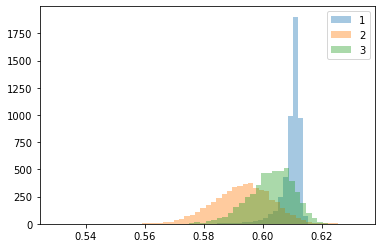

In [17]:
import seaborn as sns
sns.distplot(np.reshape(weights[:,0],[-1]),label="1",kde=False,norm_hist=False)
sns.distplot(np.reshape(weights[:,1],[-1]),label="2",kde=False,norm_hist=False)
sns.distplot(np.reshape(weights[:,2],[-1]),label="3",kde=False,norm_hist=False)
# sns.distplot(np.reshape(weights[:,3],[-1]),label="4",kde=False,norm_hist=False)
# sns.distplot(np.reshape(weights[:,4],[-1]),label="5",kde=False,norm_hist=False)
# sns.distplot(np.reshape(weights[:,5],[-1]),label="6",kde=False,norm_hist=False)
# sns.distplot(np.reshape(weights[:,6],[-1]),label="7",kde=False,norm_hist=False)
plt.legend()

In [23]:
weights.shape

(1000, 3)

In [34]:
cnt_1 = 0
cnt_2 = 0
cnt_3 = 0
e= 0.64
for i in range(1000):
    if weights[i,0]>e:
        cnt_1+=1
    if weights[i,1]>e:
        cnt_2+=1
    if weights[i,2]>e:
        cnt_3+=1
print(cnt_1/1000.0)
print(cnt_2/1000.0)
print(cnt_3/1000.0)

0.614
0.492
0.665


In [20]:
news_self_emd = self_att_emd_layer(all_news_unique)

q-k: (50392, 4, 30, 100) (50392, 4, 30, 100)
a: (50392, 4, 30, 30)


In [21]:
att1 = att_layer_layer_1.get_attention_weight(news_self_emd,masking_layer(all_news_unique))
att2 = att_layer_layer_2.get_attention_weight(news_self_emd,masking_layer(all_news_unique))
att3 = att_layer_layer_3.get_attention_weight(news_self_emd,masking_layer(all_news_unique))

In [22]:
att_1 = K.eval(att1)[:,:,0]
att_2 = K.eval(att2)[:,:,0]
att_3 = K.eval(att3)[:,:,0]

In [26]:
weights_matrix_all = np.array(np.stack((att_1,att_2,att_3),axis=1))
sentences_all = [[dictWord[i] for i in K.eval(all_news_unique[t_i])] for t_i in range(len(all_news_unique))]
all_news_vert = K.eval(all_news_vert)

In [27]:
#找出某个类别的多个文章

category_news =[]
cnt=0
for i in range(len(all_news_unique)):
#     print(i)
    if all_news_vert[indices[i]][0]==3:
        category_news.append(i)
        cnt=cnt+1
        if cnt>20:
            break

In [35]:
att_1[55]

array([0.23868993, 0.26982722, 0.2585656 , 0.23291719, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [36]:
att_2[55]

array([0.26293355, 0.2370913 , 0.17588918, 0.32408598, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

In [37]:
att_3[55]

array([0.28754562, 0.26958045, 0.24437998, 0.1984939 , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ],
      dtype=float32)

/home/myz/anaconda3/envs/reco_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator
/home/myz/anaconda3/envs/reco_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator


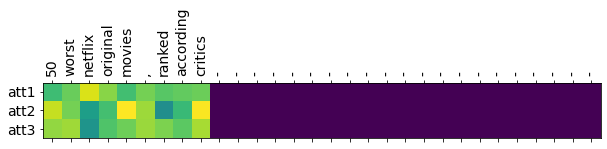

50 worst netflix original movies , ranked according critics - - - - - - - - - - - - - - - - - - - - -


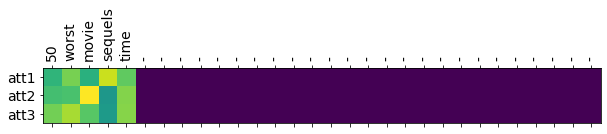

50 worst movie sequels time - - - - - - - - - - - - - - - - - - - - - - - - -


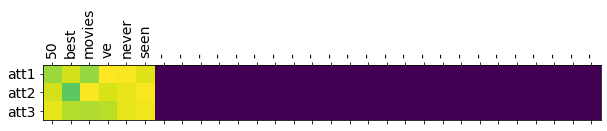

50 best movies ve never seen - - - - - - - - - - - - - - - - - - - - - - - -


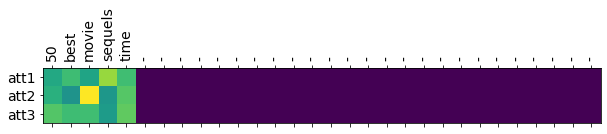

50 best movie sequels time - - - - - - - - - - - - - - - - - - - - - - - - -


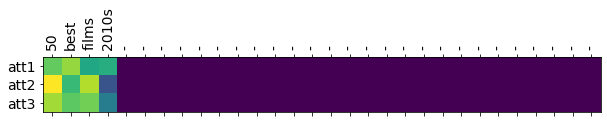

50 best films 2010s - - - - - - - - - - - - - - - - - - - - - - - - - -


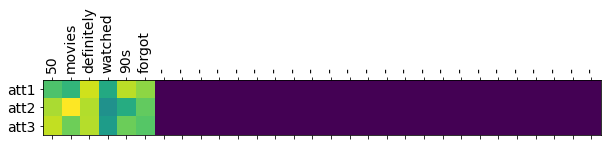

50 movies definitely watched 90s forgot - - - - - - - - - - - - - - - - - - - - - - - -


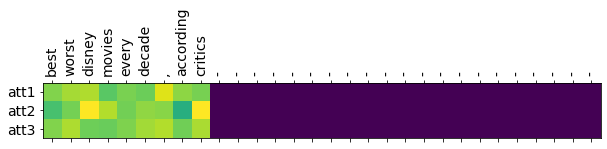

best worst disney movies every decade , according critics - - - - - - - - - - - - - - - - - - - - -


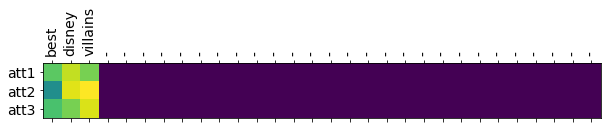

best disney villains - - - - - - - - - - - - - - - - - - - - - - - - - - -


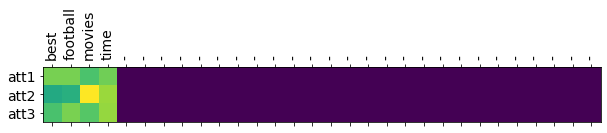

best football movies time - - - - - - - - - - - - - - - - - - - - - - - - - -


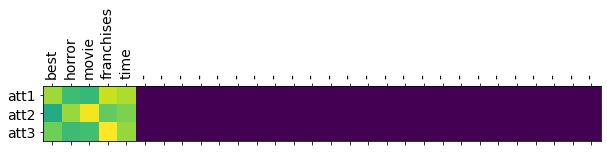

best horror movie franchises time - - - - - - - - - - - - - - - - - - - - - - - - -


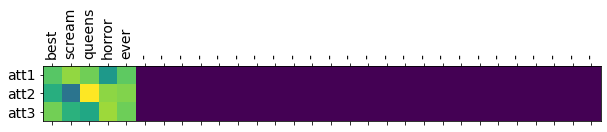

best scream queens horror ever - - - - - - - - - - - - - - - - - - - - - - - - -


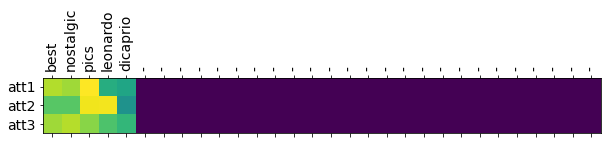

best nostalgic pics leonardo dicaprio - - - - - - - - - - - - - - - - - - - - - - - - -


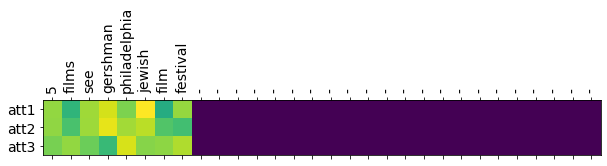

5 films see gershman philadelphia jewish film festival - - - - - - - - - - - - - - - - - - - - - -


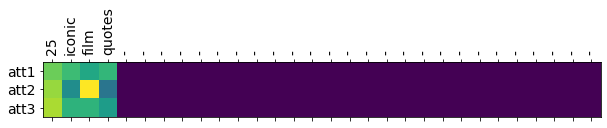

25 iconic film quotes - - - - - - - - - - - - - - - - - - - - - - - - - -


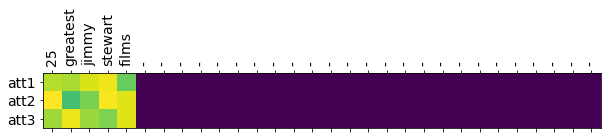

25 greatest jimmy stewart films - - - - - - - - - - - - - - - - - - - - - - - - -


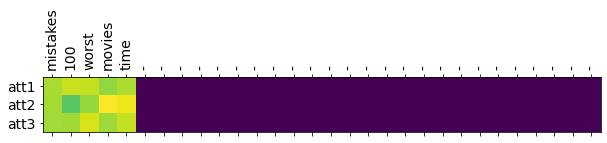

mistakes 100 worst movies time - - - - - - - - - - - - - - - - - - - - - - - - -


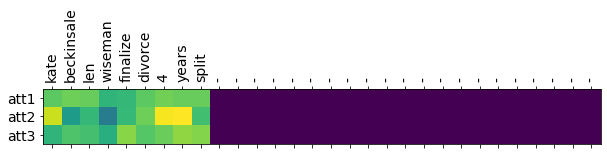

kate beckinsale len wiseman finalize divorce 4 years split - - - - - - - - - - - - - - - - - - - - -


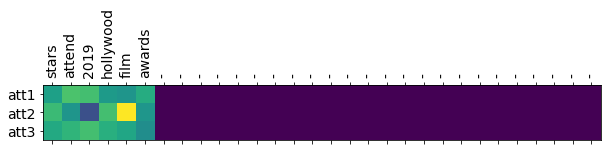

stars attend 2019 hollywood film awards - - - - - - - - - - - - - - - - - - - - - - - -


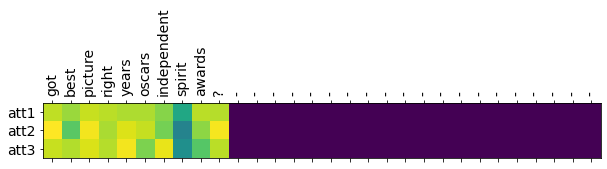

got best picture right years oscars independent spirit awards ? - - - - - - - - - - - - - - - - - - - -


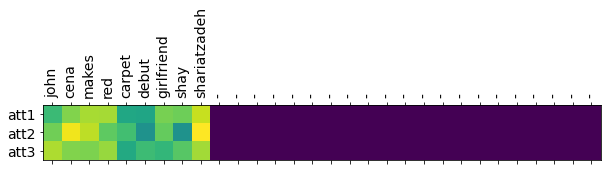

john cena makes red carpet debut girlfriend shay shariatzadeh - - - - - - - - - - - - - - - - - - - - -


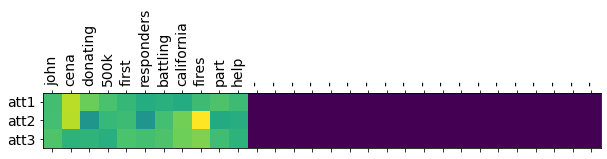

john cena donating 500k first responders battling california fires part help - - - - - - - - - - - - - - - - - - -


In [28]:
for i in category_news:
    weights_matrix = weights_matrix_all[i]
    sentences = sentences_all[i]
    
    plot_attention(weights_matrix,sentences,['att1','att2','att3'])
    print(' '.join(sentences))

In [38]:
import numpy as np

In [42]:
X1 = K.eval(news_multi_emd[:500,0,:])
X2 = K.eval(news_multi_emd[:500,1,:])
X3 = K.eval(news_multi_emd[:500,2,:])
# X4 = K.eval(news_multi_emd[:,3,:])
# X5 = K.eval(news_multi_emd[:,4,:])

X1 = np.unique(X1, axis=0)
X2 = np.unique(X2, axis=0)
X3 = np.unique(X3, axis=0)
# X4 = np.unique(X4, axis=0)
# X5 = np.unique(X5, axis=0)

y1 = np.zeros(len(X1))
y2 = np.zeros(len(X2))+1
y3 = np.zeros(len(X3))+2
# y4 = np.zeros(len(X4))+3
# y5 = np.zeros(len(X5))+4

In [43]:
PRW = K.eval(weight_layer.PRW)
PRW_X = PRW.T
PRW_Y = np.array([3,3,3])

In [44]:
# X = np.concatenate((X1,X2,X3), axis=0)
# y = np.concatenate((y1,y2,y3), axis=0)

X = np.concatenate((X1,X2,X3,PRW_X), axis=0)
y = np.concatenate((y1,y2,y3,PRW_Y), axis=0)

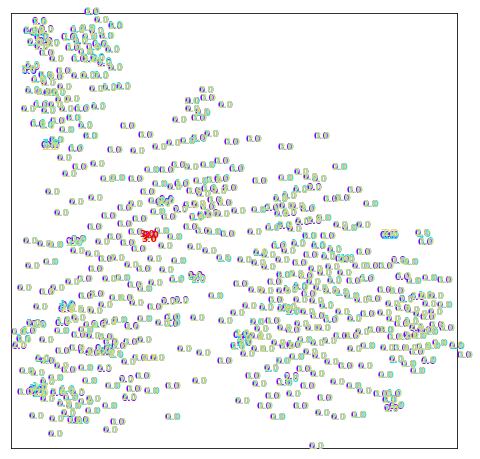

In [45]:
plot_vectors(X,y,4)

In [11]:
a=tf.range(12)

In [12]:
a = tf.reshape(a,[2,6])

In [18]:
K.eval(a)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]], dtype=int32)

In [13]:
b = tf.keras.layers.Concatenate(axis=1)([a,a,a])

In [17]:
b

<tf.Tensor 'concatenate_8/concat:0' shape=(2, 18) dtype=int32>

In [16]:
from tensorflow.keras import backend as K

K.eval(b)

array([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5,  0,  1,  2,  3,
         4,  5],
       [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11,  6,  7,  8,  9,
        10, 11]], dtype=int32)

In [20]:
c1 = tf.keras.layers.Reshape((3,6))(b)
c2 = tf.keras.layers.Reshape((6,3))(b)

In [21]:
K.eval(c1)

array([[[ 0,  1,  2,  3,  4,  5],
        [ 0,  1,  2,  3,  4,  5],
        [ 0,  1,  2,  3,  4,  5]],

       [[ 6,  7,  8,  9, 10, 11],
        [ 6,  7,  8,  9, 10, 11],
        [ 6,  7,  8,  9, 10, 11]]], dtype=int32)

In [22]:
K.eval(c2)

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 0,  1,  2],
        [ 3,  4,  5],
        [ 0,  1,  2],
        [ 3,  4,  5]],

       [[ 6,  7,  8],
        [ 9, 10, 11],
        [ 6,  7,  8],
        [ 9, 10, 11],
        [ 6,  7,  8],
        [ 9, 10, 11]]], dtype=int32)

In [23]:
c2

<tf.Tensor 'reshape_17_1/Reshape:0' shape=(2, 6, 3) dtype=int32>

In [24]:
c3 = tf.transpose(c2, [0,2,1])

In [25]:
K.eval(c3)

array([[[ 0,  3,  0,  3,  0,  3],
        [ 1,  4,  1,  4,  1,  4],
        [ 2,  5,  2,  5,  2,  5]],

       [[ 6,  9,  6,  9,  6,  9],
        [ 7, 10,  7, 10,  7, 10],
        [ 8, 11,  8, 11,  8, 11]]], dtype=int32)

In [26]:
d1 = tf.stack([a,a,a])

In [30]:
d2 = tf.transpose(d1, perm=[1, 0, 2])

In [31]:
d2

<tf.Tensor 'transpose_85:0' shape=(2, 3, 6) dtype=int32>

In [32]:
K.eval(d2)

array([[[ 0,  1,  2,  3,  4,  5],
        [ 0,  1,  2,  3,  4,  5],
        [ 0,  1,  2,  3,  4,  5]],

       [[ 6,  7,  8,  9, 10, 11],
        [ 6,  7,  8,  9, 10, 11],
        [ 6,  7,  8,  9, 10, 11]]], dtype=int32)

In [ ]:
        user_present = tf.stack(user_present)
        user_present = tf.transpose(user_present, perm=[1, 0, 2])


In [ ]:
pred_title = [MultiAttLayers[i](y[:,:,i,:]) for i in range(hparams.channels)] #(3,?,dim)                        
pred_title = layers.Concatenate(axis=1)(pred_title) # (?,dim*3)
pred_title = layers.Reshape((self.channels,self.hidden_dim),)(pred_title) #(?,3,dim)        
